**GEOSPATIAL ANALYSIS**

In [3]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

PLOTTING THE MAP

In [6]:
country = geopandas.read_file('gz_2010_us_040_00_5m.json')

In [7]:
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [9]:
country.geometry

0     MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...
1     MULTIPOLYGON (((-166.10574 53.98861, -166.0752...
2     POLYGON ((-112.53859 37.00067, -112.53454 37.0...
3     POLYGON ((-94.04296 33.01922, -94.04304 33.079...
4     MULTIPOLYGON (((-122.42144 37.86997, -122.4213...
5     POLYGON ((-106.19055 40.99761, -106.06118 40.9...
6     POLYGON ((-71.79924 42.00807, -71.79792 41.935...
7     MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ...
8     POLYGON ((-77.03860 38.79151, -77.03890 38.800...
9     MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...
10    POLYGON ((-84.81048 34.98761, -84.80918 34.987...
11    MULTIPOLYGON (((-155.77823 20.24574, -155.7727...
12    POLYGON ((-111.04416 43.02005, -111.04413 43.0...
13    POLYGON ((-89.36603 42.50027, -89.36156 42.500...
14    POLYGON ((-84.80248 40.52805, -84.80255 40.501...
15    POLYGON ((-91.21771 43.50055, -91.21827 43.497...
16    POLYGON ((-99.54112 36.99957, -99.55807 36.999...
17    MULTIPOLYGON (((-89.48511 36.49769, -89.49

In [8]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [10]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [12]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

<AxesSubplot:>

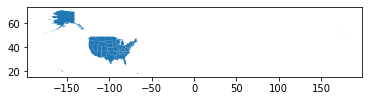

In [14]:
country.plot()

In [17]:
main_usa = country[country['NAME'].isin(['Alaska','Hawaii']) == False]

<AxesSubplot:>

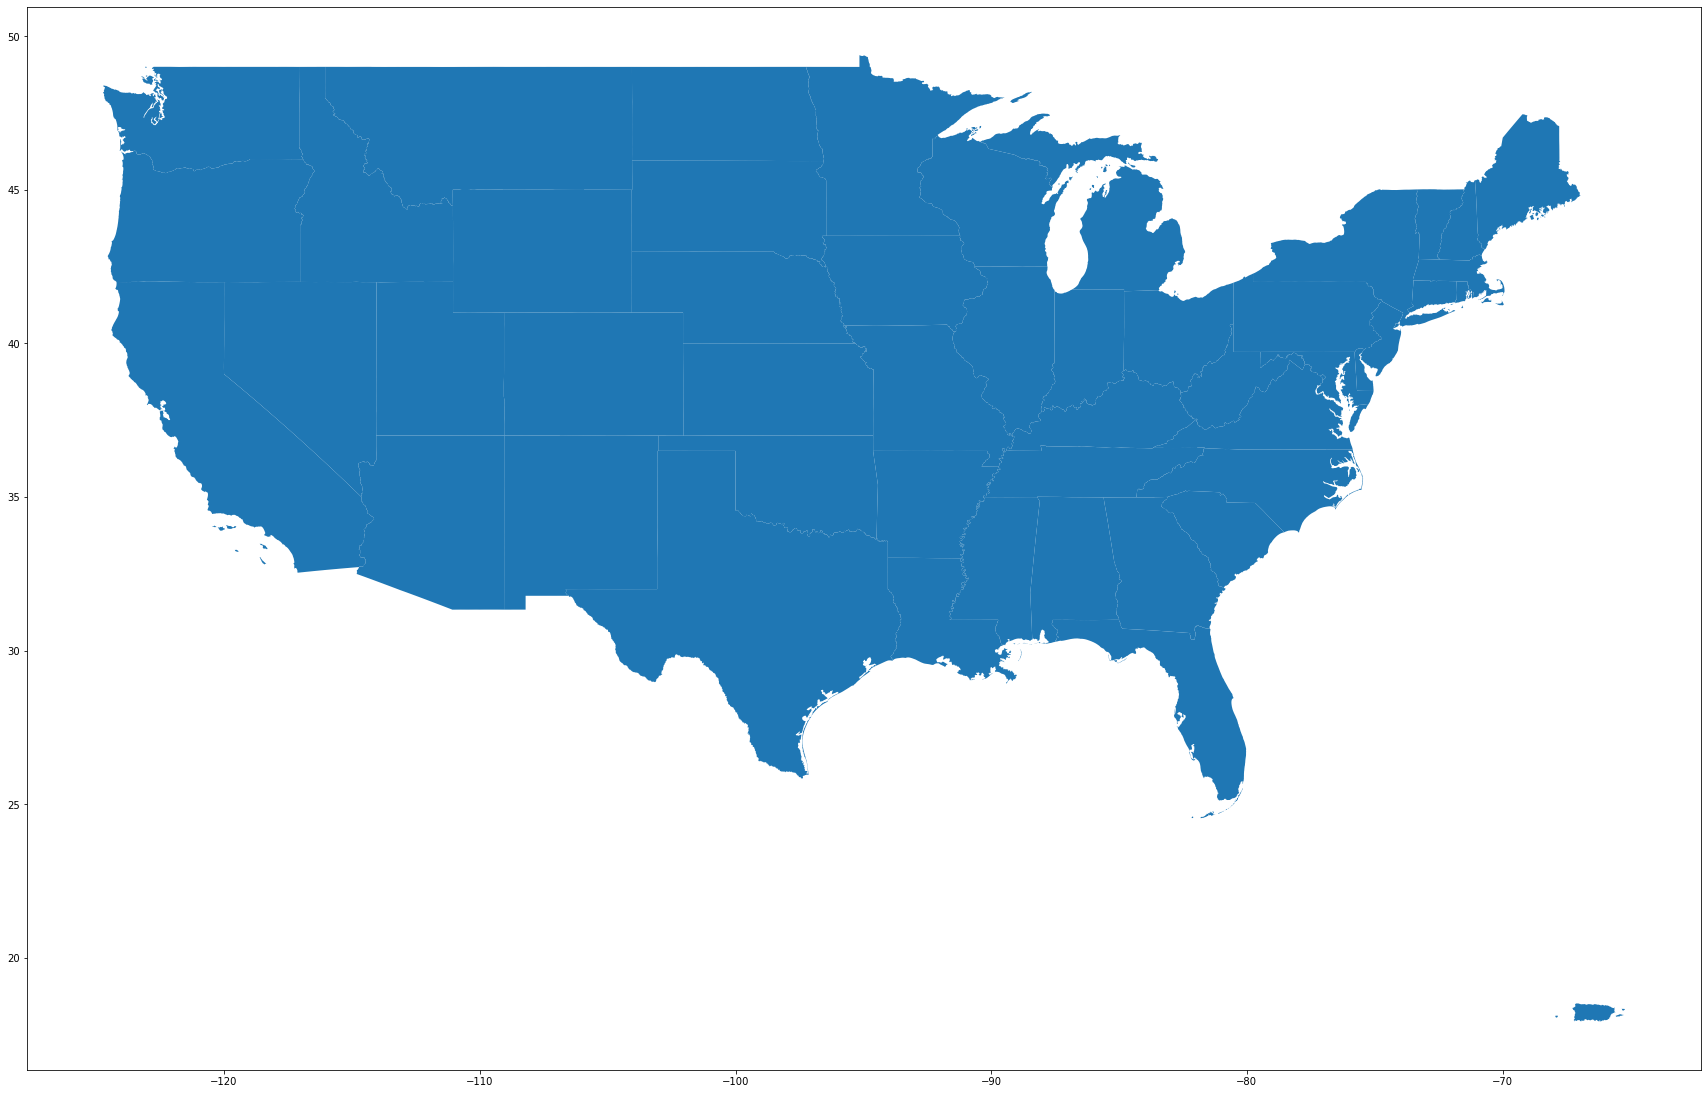

In [20]:
main_usa.plot(figsize=(30,20))

LOAD DATA

In [21]:
florence = pd.read_csv('export.csv')

In [22]:
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,Received,Forecaster
0,1,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed,1902-06-12 12:00:00,Unknown
1,2,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed,1902-06-12 18:00:00,Unknown
2,3,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed,1902-06-13 00:00:00,Unknown
3,4,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed,1902-06-13 06:00:00,Unknown
4,5,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed,1902-06-13 12:00:00,Unknown


EXPLORATORY DATA ANALYSIS

- check the data type and info
- any missing values
- statistical data

In [23]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36112 entries, 0 to 36111
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  36112 non-null  object 
 1   Date            36112 non-null  object 
 2   Lat             36112 non-null  float64
 3   Long            36112 non-null  float64
 4   Wind            36112 non-null  int64  
 5   Pres            36112 non-null  int64  
 6   Movement        36112 non-null  object 
 7   stormtypeName   36112 non-null  object 
 8   Name            36111 non-null  object 
 9   Received        36112 non-null  object 
 10  Forecaster      35642 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.0+ MB


In [24]:
florence.describe()

,Lat,Long,Wind,Pres
count,36112.000000,36112.000000,36112.000000,36112.000000
mean,26.386099,-66.701224,63.362871,550.518664
std,9.406480,18.967751,30.095669,491.556017
min,0.000000,-109.800000,5.000000,0.000000
25%,18.800000,-81.600000,40.000000,0.000000
50%,26.000000,-68.700000,60.000000,961.000000
75%,32.400000,-53.800000,80.000000,1000.000000
max,70.700000,-0.000000,190.000000,1016.000000


In [25]:
#only need time,coords,lat,long.
#optional: movement and type

In [27]:
florence = florence.drop(['AdvisoryNumber','Forecaster','Received'],axis=1)

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name
0,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed
1,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed
2,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed
3,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed
4,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed
...,...,...,...,...,...,...,...,...
36107,2020-11-17 23:00:00,13.7,-86.9,50,998,W at 12 MPH,Tropical Storm,Iota
36108,2020-11-18 02:00:00,13.7,-87.3,40,1000,W at 12 MPH,Tropical Storm,Iota
36109,2020-11-18 05:00:00,13.7,-87.8,40,1005,W at 12 MPH,Tropical Storm,Iota
36110,2020-11-18 08:00:00,13.7,-88.3,35,1007,WSW at 13 MPH,Tropical Depression,Iota


considering the location is in the west, you need to ensure that the long is in negative

by running this
florence['Long'] = 0 - florence['Long']
florence.head()

In [36]:
#.values is to change it dataframe into array
#tolist is to make it into a list

florence['coordinates'] = florence[['Long','Lat']].values.tolist()

In [37]:
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,coordinates
0,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed,"[-84.0, 17.7]"
1,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed,"[-83.6, 19.1]"
2,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed,"[-83.3, 20.7]"
3,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed,"[-83.1, 22.2]"
4,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed,"[-83.0, 23.8]"


In [ ]:
#change the coords into geopoint

In [38]:
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,coordinates
0,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed,POINT (-84 17.7)
1,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed,POINT (-83.59999999999999 19.1)
2,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed,POINT (-83.3 20.7)
3,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed,POINT (-83.09999999999999 22.2)
4,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed,POINT (-83 23.8)


In [39]:
#converting dataframe into geodataframe and geo series
florence = geopandas.GeoDataFrame(florence,geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,coordinates
0,1902-06-12 12:00:00,17.7,-84.0,35,0,0 at 0mph,Tropical Depression,Unnamed,POINT (-84.00000 17.70000)
1,1902-06-12 18:00:00,19.1,-83.6,35,0,15 at 16mph,Tropical Depression,Unnamed,POINT (-83.60000 19.10000)
2,1902-06-13 00:00:00,20.7,-83.3,40,0,10 at 18mph,Tropical Storm,Unnamed,POINT (-83.30000 20.70000)
3,1902-06-13 06:00:00,22.2,-83.1,45,0,5 at 17mph,Tropical Storm,Unnamed,POINT (-83.10000 22.20000)
4,1902-06-13 12:00:00,23.8,-83.0,50,0,5 at 18mph,Tropical Storm,Unnamed,POINT (-83.00000 23.80000)


In [40]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [41]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [43]:
florence[florence['Name'] =='Six']

,Date,Lat,Long,Wind,Pres,Movement,stormtypeName,Name,coordinates
19013,2004-08-25 04:00:00,11.2,-36.0,30,1009,WEST NEAR 17 MPH,Tropical Depression,Six,POINT (-36.00000 11.20000)
19014,2004-08-25 10:00:00,11.4,-37.6,35,1008,WEST NEAR 17 MPH,Tropical Depression,Six,POINT (-37.60000 11.40000)
19015,2004-08-25 16:00:00,11.4,-39.1,35,1008,WEST NEAR 17 MPH,Tropical Depression,Six,POINT (-39.10000 11.40000)
19082,2005-07-21 22:00:00,25.3,-75.4,35,1009,WEST-NORTHWEST NEAR 13 MPH,Tropical Depression,Six,POINT (-75.40000 25.30000)
19124,2006-09-03 22:00:00,14.6,-40.4,35,1005,NORTHWEST NEAR 14 MPH,Tropical Depression,Six,POINT (-40.40000 14.60000)
19125,2006-09-04 04:00:00,14.8,-40.4,35,1005,NORTHWEST NEAR 12 MPH,Tropical Depression,Six,POINT (-40.40000 14.80000)
19126,2006-09-04 10:00:00,15.6,-41.1,35,1005,NORTHWEST NEAR 12 MPH,Tropical Depression,Six,POINT (-41.10000 15.60000)
19127,2006-09-04 16:00:00,16.3,-42.7,35,1005,NORTHWEST NEAR 12 MPH,Tropical Depression,Six,POINT (-42.70000 16.30000)
19128,2006-09-04 22:00:00,16.9,-43.8,35,1005,NORTHWEST NEAR 12 MPH,Tropical Depression,Six,POINT (-43.80000 16.90000)
19129,2006-09-05 04:00:00,17.3,-44.8,35,1007,WEST-NORTHWEST NEAR 13 MPH,Tropical Depression,Six,POINT (-44.80000 17.30000)


In [60]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').stormtypeName.count()

Name
Abby        92
Able       146
Agnes       35
Alberto    219
Alex       112
          ... 
Vince        8
Wilfred     11
Wilma       70
Ywo          1
Zeta        68
Name: stormtypeName, Length: 329, dtype: int64

In [54]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 63.3629 mph and it can go up to 190 mph maximum


In [55]:
round(florence.Wind.mean(),4),florence.Wind.max()

(63.3629, 190)

VISUALISATION

<AxesSubplot:>

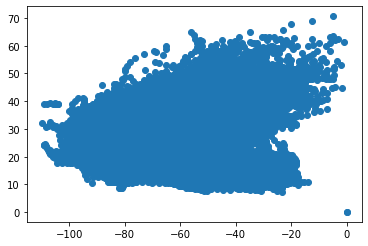

In [61]:
florence.plot()

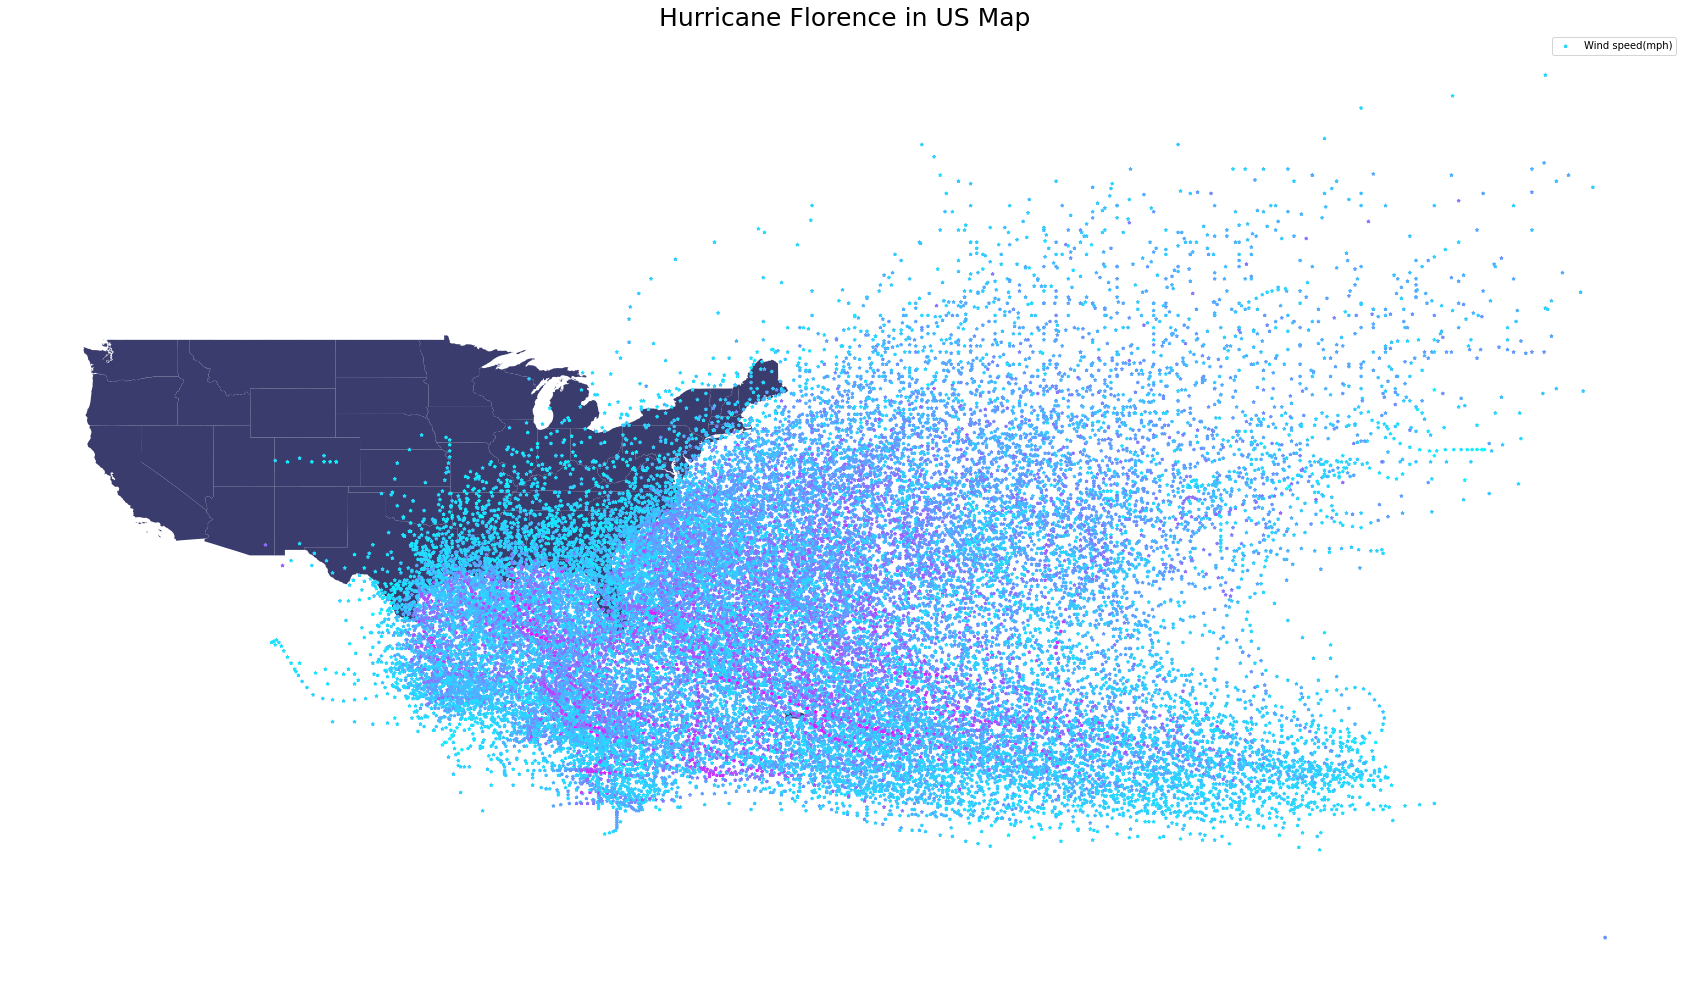

In [72]:
fig,ax = plt.subplots(1,figsize=(30,20))

#plotting the hurricane on the usmap

base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax,color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:

florence.plot(ax=base,column='Wind',marker='*',markersize=10,cmap='cool',label='Wind speed(mph)')
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map",fontsize =25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');


import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns
import datetime
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('script_113631134_20210423193311_combine.csv')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,PLTEST001,3114,NaN,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,NaN,SCHROEDER PLAZA,0.000000,0.000000,"(0, 0)"
1,212996778,3301,NaN,VERBAL DISPUTE,C6,204,0,2021-02-01 06:20:00,2021,2,Monday,6,NaN,GILLETTE PARK,42.344125,-71.056853,"(42.3441248392933, -71.0568533916328)"
2,212929649,801,NaN,ASSAULT - SIMPLE,D14,784,0,2021-03-31 20:10:00,2021,3,Wednesday,20,NaN,NEVINS ST,42.349286,-71.146727,"(42.3492856899685, -71.146727204671)"
3,212922650,3115,NaN,INVESTIGATE PERSON,A7,26,0,2021-04-08 00:00:00,2021,4,Thursday,0,NaN,MERIDIAN ST,42.379015,-71.039207,"(42.3790149807813, -71.0392066425822)"
4,212918748,3005,NaN,SICK ASSIST,D4,138,0,2021-03-24 09:53:00,2021,3,Wednesday,9,NaN,BOYLSTON ST,42.349325,-71.080148,"(42.3493247128501, -71.0801480124617)"


In [5]:
boston = (42.358442,-71.05977)
m= folium.Map(location = boston,tile='Stamen terrain',zoom_start=12)
m

In [6]:
#call the instance
mc = MarkerCluster()

In [10]:
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'],row['Long']]))
m.add_child(mc)

NameError: name 'Marker' is not defined

My study here on geopanda with python is based on the link below:

https://www.kaggle.com/learn/geospatial-analysis

- assuming youve installed geopandas, enter the code below to activate the environment

-- conda create -n geo_env

In [1]:
import geopandas as gpd

geospatial file formats such as shapefile,GeoJSON,KML,GPKG
to read run:

gpd.read_file()

In [5]:
full_data = gpd.read_file("DEClands.shp")

In [8]:
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [9]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [16]:
full_data.loc[:,["CLASS","COUNTY","geometry"]].copy()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."
...,...,...,...
2999,None,ALBANY,"POLYGON ((592614.788 4730677.364, 592772.235 4..."
3000,WILD FOREST,SARATOGA,"POLYGON ((585765.509 4786488.841, 585761.900 4..."
3001,None,LEWIS,"POLYGON ((470480.308 4836221.838, 470503.974 4..."
3002,None,LEWIS,"POLYGON ((456340.400 4813453.700, 455695.800 4..."


In [22]:
data.value_counts

<bound method DataFrame.value_counts of             CLASS    COUNTY                                           geometry
0     WILD FOREST  HERKIMER  POLYGON ((502476.666 4842386.993, 502476.739 4...
1     WILD FOREST  HERKIMER  POLYGON ((502090.747 4840324.577, 502110.011 4...
2     WILD FOREST     LEWIS  POLYGON ((508503.626 4864992.965, 509092.576 4...
3     WILD FOREST     LEWIS  POLYGON ((490114.810 4859403.501, 490142.561 4...
4     WILD FOREST     LEWIS  POLYGON ((481679.514 4853407.042, 481072.554 4...
...           ...       ...                                                ...
2999         None    ALBANY  POLYGON ((592614.788 4730677.364, 592772.235 4...
3000  WILD FOREST  SARATOGA  POLYGON ((585765.509 4786488.841, 585761.900 4...
3001         None     LEWIS  POLYGON ((470480.308 4836221.838, 470503.974 4...
3002         None     LEWIS  POLYGON ((456340.400 4813453.700, 455695.800 4...
3003         None    OSWEGO  POLYGON ((427425.836 4828336.731, 427436.210 4...

[3004 rows 

In [23]:
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [24]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST',"WILDERNESS"])].copy()

In [25]:
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [29]:
#my own failed method of trying to select WILD FOREST and WILDERNESS

data['CLASS'] == 'WILD FOREST'
data['CLASS'] == 'WILDERNESS'

0       False
1       False
2       False
3       False
4       False
        ...  
2999    False
3000    False
3001    False
3002    False
3003    False
Name: CLASS, Length: 3004, dtype: bool

In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

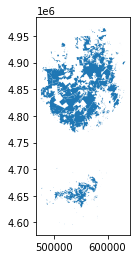

In [38]:
plt.figure(figsize=(12,8))
wild_lands.plot()

In [40]:
#GEOMETRY COLUMN
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

identify POINT, LINESTRING and POLYGON

In [ ]:
POI_data = gdp.read_file("...shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

roads_trail = gpd.read_file(..shp)
trails = roas_trail.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

countries = gpd.read_file(..shp)